In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas

data_path = '/path_to_data/SEER Data'

#324,117 rows for breast patients with survival 2010 -2015 (alive or dead attributable to this cancer dx)
Breast_survival_2 = pandas.read_csv(data_path+'/Breast survival 2010 -2015/export.txt', sep="\t", header=None, names=["PatientID", "Age", "YearDx", "Sex", "Race", "ICDO3", "Grade", "Laterality", "SeqNum", "PrimarySite-labeled", "DiagnosticConfirmation", "ICCCSite", "CombinedSummaryStage", "SurvivalMonths", "VitalStatus", 'CauseSpecificDeathClassification', 'CODtoSite'])

In [5]:
#basic info
Breast_survival_2.info()

#numeric data
#Breast_survival_2.describe()

#check duplication
Breast_survival_2.duplicated().sum()

#check missing data
Breast_survival_2.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314261 entries, 0 to 314260
Data columns (total 17 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   PatientID                         314261 non-null  int64 
 1   Age                               314261 non-null  object
 2   YearDx                            314261 non-null  int64 
 3   Sex                               314261 non-null  object
 4   Race                              314261 non-null  object
 5   ICDO3                             314261 non-null  object
 6   Grade                             314261 non-null  object
 7   Laterality                        314261 non-null  object
 8   SeqNum                            314261 non-null  object
 9   PrimarySite-labeled               314261 non-null  object
 10  DiagnosticConfirmation            314261 non-null  object
 11  ICCCSite                          314261 non-null  object
 12  Co

0

PatientID                           0
Age                                 0
YearDx                              0
Sex                                 0
Race                                0
ICDO3                               0
Grade                               0
Laterality                          0
SeqNum                              0
PrimarySite-labeled                 0
DiagnosticConfirmation              0
ICCCSite                            0
CombinedSummaryStage                0
SurvivalMonths                      0
VitalStatus                         0
CauseSpecificDeathClassification    0
CODtoSite                           0
dtype: int64

In [4]:
#Duplicated PatientID - Some patients has multiple rows in the dataset (multiple tumor cases)
#314261 unique patients
Breast_survival_2= Breast_survival_2.sort_index(ascending=False).drop_duplicates(['PatientID'])
Breast_survival_2= Breast_survival_2.sort_index().reset_index(drop=True)
Breast_survival_2.shape
len(Breast_survival_2.PatientID.unique())
#Breast_survival_2

(314261, 17)

314261

In [6]:
#for col in Breast_survival_2.columns:
#    Breast_survival_2[col].value_counts()

In [7]:
Breast_survival_2.groupby(['VitalStatus'])['CauseSpecificDeathClassification'].value_counts()

VitalStatus  CauseSpecificDeathClassification     
Alive        Alive or dead of other cause             268895
             N/A not seq 0-59                              4
Dead         Dead (attributable to this cancer dx)     45362
Name: count, dtype: int64

### Sampling

In [8]:
#drop duplications (same feature and different patientid)
import pandas as pd

feature_outcome = Breast_survival_2.drop(columns=['CauseSpecificDeathClassification','CODtoSite','PatientID'])
feature_outcome = feature_outcome.drop_duplicates()
patientid = Breast_survival_2['PatientID']

df = pd.merge(feature_outcome, patientid, left_index=True, right_index=True)
df.shape

(231930, 15)

VitalStatus
Alive    188093
Dead      43837
Name: count, dtype: int64

<AxesSubplot:xlabel='YearDx'>

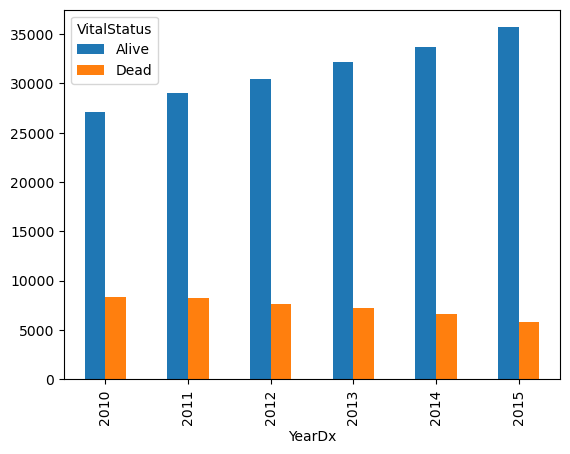

In [9]:
df['VitalStatus'].value_counts()
df.groupby('YearDx')['VitalStatus'].value_counts().unstack().plot(kind = 'bar')

In [10]:
#check correlation
"""
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

encoding_dict = defaultdict(LabelEncoder)
breast_survival_encoded = df.apply(lambda x: encoding_dict[x.name].fit_transform(x))

plt.figure(figsize=(16,10))
sns.heatmap(breast_survival_encoded.corr(), annot=True, fmt='.2f')
plt.show()
"""

"\nfrom collections import defaultdict\nfrom sklearn.preprocessing import LabelEncoder\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\nencoding_dict = defaultdict(LabelEncoder)\nbreast_survival_encoded = df.apply(lambda x: encoding_dict[x.name].fit_transform(x))\n\nplt.figure(figsize=(16,10))\nsns.heatmap(breast_survival_encoded.corr(), annot=True, fmt='.2f')\nplt.show()\n"

In [11]:
#disproportionate sampling, add random state for future works
sampling = df.groupby('VitalStatus', group_keys=False).apply(lambda x: x.sample(43837, random_state=42)).reset_index(drop=True)
sampling.to_csv(data_path+'/Breast survival 2010 -2015/breast_survival_10-15_sample.csv')

<AxesSubplot:xlabel='YearDx'>

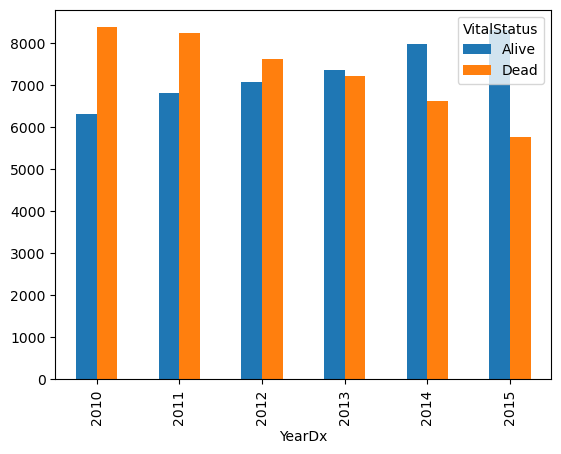

In [12]:
sampling.groupby('YearDx')['VitalStatus'].value_counts().unstack().plot(kind = 'bar')

In [13]:
#split to 60k, 30k
import numpy as np

np.random.seed(42)
rndperm = np.random.permutation(sampling.shape[0])

sampling_holdout = sampling.iloc[rndperm[:30000],:].copy().reset_index(drop=True)
sampling_holdout.shape
sampling_holdout['VitalStatus'].value_counts()
sampling_holdout.to_csv(data_path+'/Breast survival 2010 -2015/holdout.csv')

sampling_synthetic = sampling.iloc[rndperm[30000:len(sampling)],:].copy().reset_index(drop=True)
sampling_synthetic.shape
sampling_synthetic['VitalStatus'].value_counts()
sampling_synthetic.to_csv(data_path+'/Breast survival 2010 -2015/synthetic.csv')


(30000, 15)

VitalStatus
Alive    15025
Dead     14975
Name: count, dtype: int64

(57674, 15)

VitalStatus
Dead     28862
Alive    28812
Name: count, dtype: int64